In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
# get all files in results starting with the name output
zdims = [5, 8, 13, 21, 55, 89, 144]
steps = [10, 15, 20, 25, 30, 100]
names = os.listdir('results')
stats_names = [name for name in names if 'stats' in name]
out_names = [name for name in names if 'output' in name]

out_grouped = []
# print(out_names)

for dim in zdims:
    buffer = []
    for name in out_names:
        zdim = int(name.split("_")[1].split("_")[0])
        if dim == zdim:
            buffer.append(name)

    out_grouped.append(sorted(buffer))

stats_grouped = []

for dim in zdims:
    buffer = []
    for name in stats_names:
        zdim = int(name.split("_")[1].split("_")[0])
        if dim == zdim:
            buffer.append(name)

    stats_grouped.append(sorted(buffer))


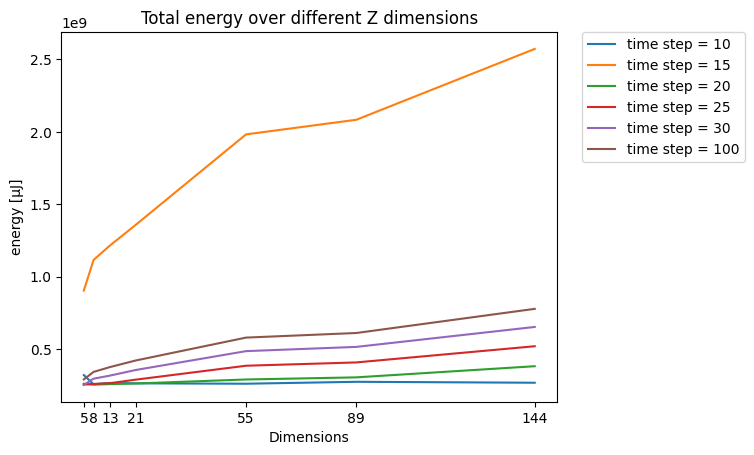

In [12]:
#TODO: energy per inference
a = np.load("results/"+stats_grouped[0][0], allow_pickle=True)

for jdx, step in enumerate(steps):
    t_energies = []
    for idx, dim in enumerate(stats_grouped):
        a = np.load("results/"+stats_grouped[idx][jdx], allow_pickle=True)
        t_energies.append(np.mean(a['avg_total_energy']) * 10)

    plt.plot(zdims, t_energies, label=f"time step = {step}") 

    
plt.xticks(zdims)
plt.xlabel('Dimensions')
plt.ylabel("energy [µJ]")
plt.title("Total energy over different Z dimensions")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

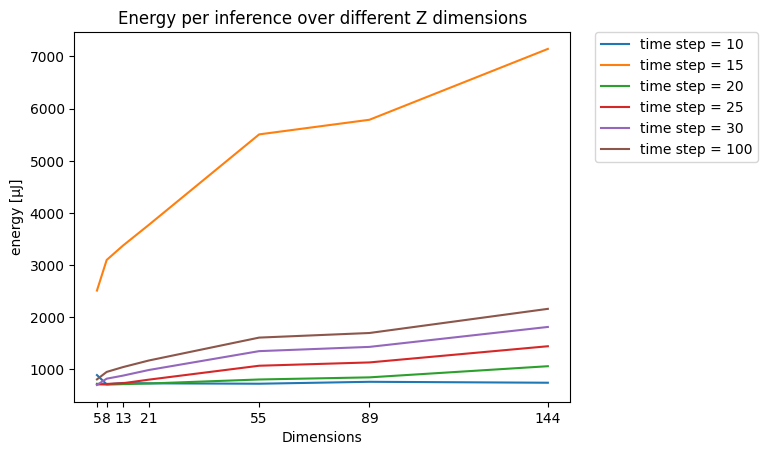

In [16]:

for jdx, step in enumerate(steps):
    t_energies = []
    for idx, dim in enumerate(stats_grouped):
        a = np.load("results/"+stats_grouped[idx][jdx], allow_pickle=True)
        t_energies.append(np.mean(a['avg_total_energy']) / 36000)

    plt.plot(zdims, t_energies, label=f"time step = {step}") 

    
plt.xticks(zdims)
plt.xlabel('Dimensions')
plt.ylabel("energy [µJ]")
plt.title("Energy per inference over different Z dimensions")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

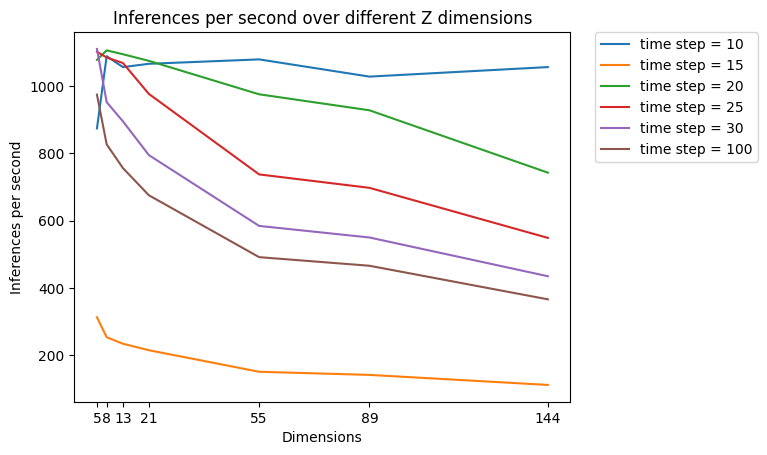

In [11]:
for jdx, step in enumerate(steps):
    t_energies = []
    for idx, dim in enumerate(stats_grouped):
        a = np.load("results/"+stats_grouped[idx][jdx], allow_pickle=True)
        # print(1/np.mean(a['avg_time_per_sample']))
        t_energies.append(1/np.mean(a['avg_time_per_sample']))

    # print(t_energies)
    plt.plot(zdims, t_energies, label=f"time step = {step}") 

    
plt.xticks(zdims)
plt.xlabel('Dimensions')
plt.ylabel("Inferences per second")
plt.title("Inferences per second over different Z dimensions")
# put legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.legend()
plt.show()

In [ ]:

def get_R(coords, center=None):
    return np.linalg.norm(coords,axis=1)


    def MSE(c, dataset_len, dim_z):
        output_data = np.zeros((dataset_len, dim_z), np.int8)
        output_data.fill(c)

        return output_data

def evaluate_radius_max(latent_space, c, dim_z):
    train_scores = get_R(latent_space - MSE(self.c, latent_space.shape[0], self.dim_z))

    max_radius = np.max(train_scores)

    return max_radius

def evaluate_radius(latent_space, r_max, c, dim_z):
    scores = get_R(latent_space - MSE(c, latent_space.shape[0], dim_z))

    scores_r = scores / r_max

    return scores_r